In [7]:
#Step 1: Import libraries & load dataset
# Cell 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [8]:
# Cell 2: Load dataset
file_path = "C://Users//kunde//Desktop//Virtual internship//CodTech IT Solutions Pvt Ltd//CodTech IT Solutions Pvt Ltd Internship//Task-3 End to end Data Science Project//Goa Power Outage Report May 2025.xlsx"
df = pd.read_excel(file_path)

# Show first 5 rows
df.head()

,Sl No,Town Name,Substation,Feeder Name,Feeder Code,Rural/Urban,No_of_Consumers,No_of_Outages,Duration_of_Outage_Sec,Average_Hours_of_Steady_Supply,Reason for power disruptions
0,1,MAPUSA,220/33KV Thivim,11KV Tivim,1S03-1108,RURAL,NaN,0,0.0,24:00:00,NaN
1,2,MAPUSA,33KV Nagoa,11KV Arpora,1S07-1105,RURAL,2209.0,0,0.0,24:00:00,NaN
2,3,PANJIM,33KV EDC,11KV Kanaka,2S02-1107,URBAN,NaN,0,0.0,24:00:00,NaN
3,4,PANJIM,33KV Bambolim,11KV Santacruz,2S05-1105,RURAL,3673.0,0,0.0,24:00:00,NaN
4,5,PANJIM,33KV Nagali hills(IT\nPark),11KV MANIPAL,2S07-1106,URBAN,2.0,0,0.0,24:00:00,NaN


In [10]:
#Step 2: Data Cleaning
# Cell 3: Check column names
print(df.columns)

# Strip spaces from column names
df.columns = df.columns.str.strip()

# Rename for easier use
df.rename(columns={
    "Town Name": "Town_Name",
    "Substation": "Substation",
    "Feeder Name": "Feeder_Name",
    "Rural/Urban": "Rural_Urban",
    "No_of_Consumers": "No_of_Consumers",
    "No_of_Outages": "No_of_Outages",
    "Duration_of_Outage_Sec": "Duration_Sec",
    "Average_Hours_of_Steady_Supply": "Steady_Supply_Hours"
}, inplace=True)

df.head()

Index(['Sl No', 'Town_Name', 'Substation', 'Feeder_Name', 'Feeder Code',
       'Rural_Urban', 'No_of_Consumers', 'No_of_Outages', 'Duration_Sec',
       'Steady_Supply_Hours', 'Reason for power disruptions'],
      dtype='object')


,Sl No,Town_Name,Substation,Feeder_Name,Feeder Code,Rural_Urban,No_of_Consumers,No_of_Outages,Duration_Sec,Steady_Supply_Hours,Reason for power disruptions
0,1,MAPUSA,220/33KV Thivim,11KV Tivim,1S03-1108,RURAL,NaN,0,0.0,24:00:00,NaN
1,2,MAPUSA,33KV Nagoa,11KV Arpora,1S07-1105,RURAL,2209.0,0,0.0,24:00:00,NaN
2,3,PANJIM,33KV EDC,11KV Kanaka,2S02-1107,URBAN,NaN,0,0.0,24:00:00,NaN
3,4,PANJIM,33KV Bambolim,11KV Santacruz,2S05-1105,RURAL,3673.0,0,0.0,24:00:00,NaN
4,5,PANJIM,33KV Nagali hills(IT\nPark),11KV MANIPAL,2S07-1106,URBAN,2.0,0,0.0,24:00:00,NaN


In [11]:
#Step 3: Handle missing values
# Cell 4: Replace NaN with 0 in numeric columns
df["No_of_Consumers"] = df["No_of_Consumers"].fillna(0).astype(int)
df["No_of_Outages"] = df["No_of_Outages"].fillna(0).astype(int)
df["Duration_Sec"] = df["Duration_Sec"].fillna(0).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Sl No                         343 non-null    int64 
 1   Town_Name                     343 non-null    object
 2   Substation                    343 non-null    object
 3   Feeder_Name                   343 non-null    object
 4   Feeder Code                   343 non-null    object
 5   Rural_Urban                   343 non-null    object
 6   No_of_Consumers               343 non-null    int32 
 7   No_of_Outages                 343 non-null    int32 
 8   Duration_Sec                  343 non-null    int32 
 9   Steady_Supply_Hours           343 non-null    object
 10  Reason for power disruptions  112 non-null    object
dtypes: int32(3), int64(1), object(7)
memory usage: 25.6+ KB


In [12]:
#Step 4: Define target variable
# Cell 5: Create target variable
df["Outage_Category"] = df["Duration_Sec"].apply(lambda x: 1 if x > 3600 else 0)

df[["Duration_Sec", "Outage_Category"]].head(10)

,Duration_Sec,Outage_Category
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [13]:
#Step 5: Encode categorical variables
# Cell 6: Label Encoding
le_town = LabelEncoder()
le_substation = LabelEncoder()
le_feeder = LabelEncoder()
le_rural_urban = LabelEncoder()

df["Town_Enc"] = le_town.fit_transform(df["Town_Name"])
df["Substation_Enc"] = le_substation.fit_transform(df["Substation"])
df["Feeder_Enc"] = le_feeder.fit_transform(df["Feeder_Name"])
df["Rural_Urban_Enc"] = le_rural_urban.fit_transform(df["Rural_Urban"])

# Save encoders
encoders = {
    "town": le_town,
    "substation": le_substation,
    "feeder": le_feeder,
    "rural_urban": le_rural_urban
}
joblib.dump(encoders, "encoders.pkl")

['encoders.pkl']

In [14]:
#Step 6: Train/Test Split
# Cell 7: Features and target
X = df[["Town_Enc", "Substation_Enc", "Feeder_Enc", "Rural_Urban_Enc", "No_of_Consumers"]]
y = df["Outage_Category"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [15]:
#Step 7: Train Model
# Cell 8: Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7681159420289855
              precision    recall  f1-score   support

           0       0.79      0.96      0.87        55
           1       0.00      0.00      0.00        14

    accuracy                           0.77        69
   macro avg       0.40      0.48      0.43        69
weighted avg       0.63      0.77      0.69        69



In [16]:
#Step 8: Save Model
# Cell 9: Save trained model
joblib.dump(model, "model.pkl")
print("✅ Model and encoders saved successfully!")

✅ Model and encoders saved successfully!


In [17]:
#Step 9: Exploratory Data Analysis & Visualizations
# Cell 10: Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

C:\Users\kunde\AppData\Local\Temp\ipykernel_21944\1546120274.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=town_outages_may.index, y=town_outages_may.values, palette='viridis')


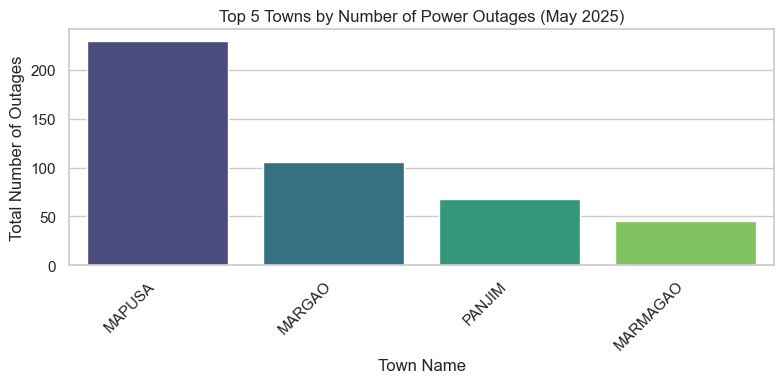

In [18]:
# Cell 11: Top 5 Towns by Number of Outages
town_outages_may = df.groupby('Town_Name')['No_of_Outages'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 4))
sns.barplot(x=town_outages_may.index, y=town_outages_may.values, palette='viridis')
plt.title('Top 5 Towns by Number of Power Outages (May 2025)')
plt.xlabel('Town Name')
plt.ylabel('Total Number of Outages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

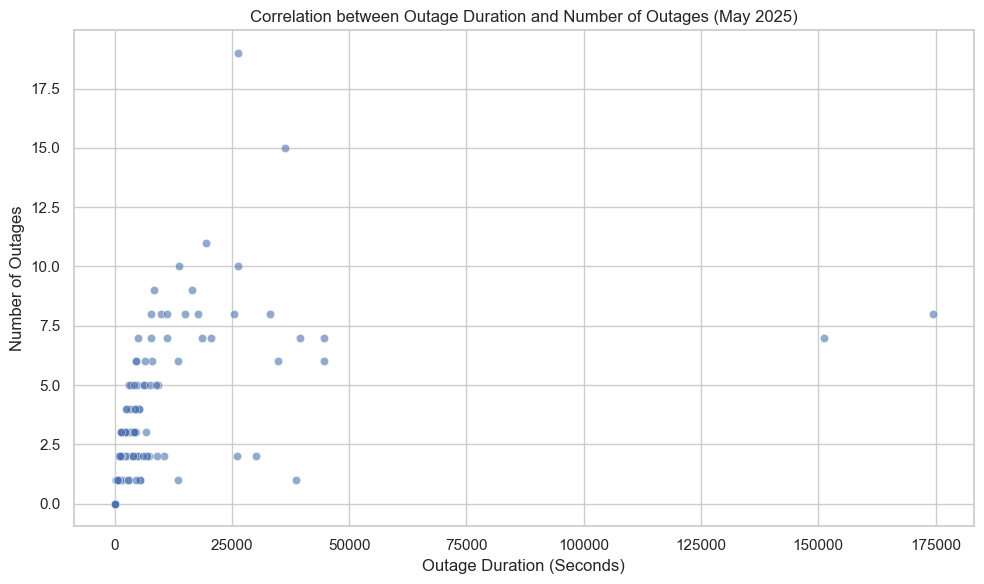

In [19]:
# Cell 12: Scatter plot – Outage Duration vs Number of Outages
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration_Sec', y='No_of_Outages', data=df, alpha=0.6, color='b')
plt.title('Correlation between Outage Duration and Number of Outages (May 2025)')
plt.xlabel('Outage Duration (Seconds)')
plt.ylabel('Number of Outages')
plt.tight_layout()
plt.show()

C:\Users\kunde\AppData\Local\Temp\ipykernel_21944\1564517607.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Substation', y='Duration_Minutes', data=substation_outages, palette='plasma')


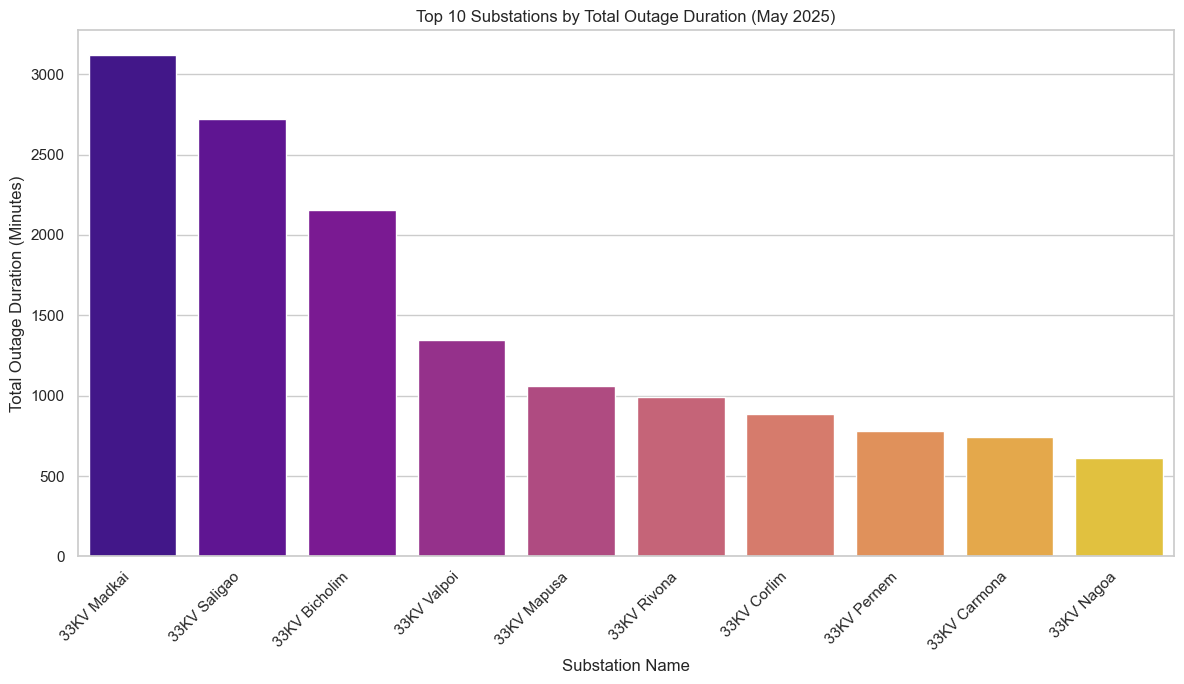

In [20]:
# Cell 14: Top 10 Substations by Total Outage Duration
substation_outages = df.groupby('Substation')['Duration_Sec'].sum().nlargest(10).reset_index()
substation_outages['Duration_Minutes'] = substation_outages['Duration_Sec'] / 60

plt.figure(figsize=(12, 7))
sns.barplot(x='Substation', y='Duration_Minutes', data=substation_outages, palette='plasma')
plt.title('Top 10 Substations by Total Outage Duration (May 2025)')
plt.xlabel('Substation Name')
plt.ylabel('Total Outage Duration (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()